In [2]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [3]:
def grovers_algorithm():
    n = 2
    grover_circuit = QuantumCircuit(n)
    grover_circuit = initialize_s(grover_circuit, [0,1])
   
    grover_circuit.cz(0,1) # Oracle

    # Diffusion operator (U_s)
    grover_circuit.h([0,1])
    grover_circuit.z([0,1])
    grover_circuit.cz(0,1)
    grover_circuit.h([0,1])
    return grover_circuit

In [4]:
grovers_algorithm()

In [5]:
def grover_2qbit():
    grover_circuit = grovers_algorithm()
    aer_sim = Aer.get_backend('aer_simulator')
    print(grover_circuit)
    tranpiled_grover_circuit = transpile(grover_circuit, aer_sim)
    print(tranpiled_grover_circuit)
    return tranpiled_grover_circuit

In [6]:
grover_2qbit()

     ┌───┐   ┌───┐┌───┐   ┌───┐
q_0: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     ├───┤ │ ├───┤├───┤ │ ├───┤
q_1: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     └───┘   └───┘└───┘   └───┘
     ┌───┐   ┌───────────┐   ┌───┐
q_0: ┤ H ├─■─┤ U2(-π,-π) ├─■─┤ H ├
     ├───┤ │ ├───────────┤ │ ├───┤
q_1: ┤ H ├─■─┤ U2(-π,-π) ├─■─┤ H ├
     └───┘   └───────────┘   └───┘


Experiment with Simulators

In [8]:
grover_circuit = grovers_algorithm()
sim = Aer.get_backend('aer_simulator')
# we need to make a copy of the circuit with the 'save_statevector'
# instruction to run on the Aer simulator
grover_circuit_sim = grover_circuit.copy()
grover_circuit_sim.save_statevector()
qobj = assemble(grover_circuit_sim)
result = sim.run(qobj).result()
statevec = result.get_statevector()
from qiskit_textbook.tools import vector2latex
vector2latex(statevec, pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

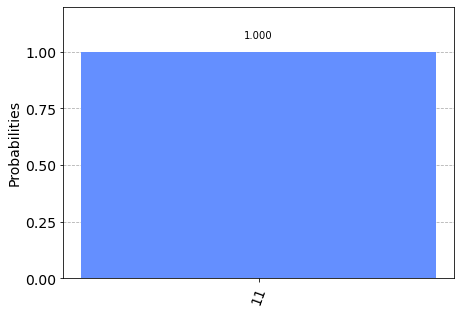

In [9]:
grover_circuit.measure_all()

aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(grover_circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

Experiment with Real Device

In [10]:
# Load IBM Q account and get the least busy backend device
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

Running on current least busy device:  ibmq_bogota


In [11]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


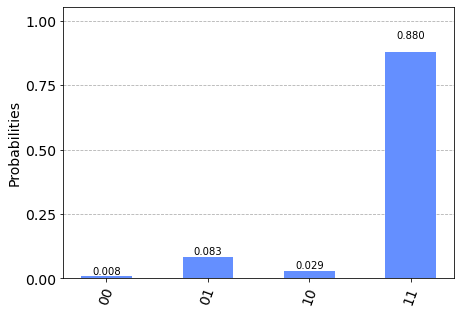

In [12]:
# Get the results from the computation
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)

In [3]:
somecircuit = QuantumCircuit(1)

In [8]:
somecircuit.s(0)
somecircuit.x(0)
somecircuit.s(0)


In [9]:
print(somecircuit)

     ┌───┐┌───┐┌───┐
q_0: ┤ S ├┤ X ├┤ S ├
     └───┘└───┘└───┘


In [12]:
sim = Aer.get_backend('aer_simulator')
print(transpile(somecircuit,sim))

     ┌────────────────┐
q_0: ┤ U3(π,π/2,-π/2) ├
     └────────────────┘
